In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import natsort
import pandas as pd
import scipy
import shutil
import cv2
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
X_train_images = '/content/drive/MyDrive/Food-11/training/'
X_test_images = '/content/drive/MyDrive/Food-11/evaluation/'

Mounted at /content/drive/


In [ ]:
sortTrainImageDir = natsort.natsorted(os.listdir(X_train_images),reverse = False)
sortTestImageDir = natsort.natsorted(os.listdir(X_test_images),reverse = False)
len(sortTrainImageDir)
len(sortTestImageDir)

resize_train=[]
trainLabel = []
for file in sortTrainImageDir:
  print(file)
  filePath = X_train_images+file
  part = file.split('_')
  print(part)
  trainLabel.append(int(part[0]))
  frame = cv2.imread(filePath)/255
  resize = cv2.resize(frame, (48, 48))
  resize_train.append(resize)

Streaming output truncated to the last 5000 lines.
8_564.jpg
['8', '564.jpg']
8_565.jpg
['8', '565.jpg']
8_566.jpg
['8', '566.jpg']
8_567.jpg
['8', '567.jpg']
8_568.jpg
['8', '568.jpg']
8_569.jpg
['8', '569.jpg']
8_570.jpg
['8', '570.jpg']
8_571.jpg
['8', '571.jpg']
8_572.jpg
['8', '572.jpg']
8_573.jpg
['8', '573.jpg']
8_574.jpg
['8', '574.jpg']
8_575.jpg
['8', '575.jpg']
8_576.jpg
['8', '576.jpg']
8_577.jpg
['8', '577.jpg']
8_578.jpg
['8', '578.jpg']
8_579.jpg
['8', '579.jpg']
8_580.jpg
['8', '580.jpg']
8_581.jpg
['8', '581.jpg']
8_582.jpg
['8', '582.jpg']
8_583.jpg
['8', '583.jpg']
8_584.jpg
['8', '584.jpg']
8_585.jpg
['8', '585.jpg']
8_586.jpg
['8', '586.jpg']
8_587.jpg
['8', '587.jpg']
8_588.jpg
['8', '588.jpg']
8_589.jpg
['8', '589.jpg']
8_590.jpg
['8', '590.jpg']
8_591.jpg
['8', '591.jpg']
8_592.jpg
['8', '592.jpg']
8_593.jpg
['8', '593.jpg']
8_594.jpg
['8', '594.jpg']
8_595.jpg
['8', '595.jpg']
8_596.jpg
['8', '596.jpg']
8_597.jpg
['8', '597.jpg']
8_598.jpg
['8', '598.jpg']
8_59

In [ ]:
resize_test=[]
testLabel = []
for file in sortTestImageDir:
  print(file)
  filePath = X_test_images+file
  part = file.split('_')
  print(part)
  testLabel.append(int(part[0]))
  frame = cv2.imread(filePath)
  resize = cv2.resize(frame, (48, 48))
  resize_test.append(resize)

Streaming output truncated to the last 5000 lines.
2_331.jpg
['2', '331.jpg']
2_332.jpg
['2', '332.jpg']
2_333.jpg
['2', '333.jpg']
2_334.jpg
['2', '334.jpg']
2_335.jpg
['2', '335.jpg']
2_336.jpg
['2', '336.jpg']
2_337.jpg
['2', '337.jpg']
2_338.jpg
['2', '338.jpg']
2_339.jpg
['2', '339.jpg']
2_340.jpg
['2', '340.jpg']
2_341.jpg
['2', '341.jpg']
2_342.jpg
['2', '342.jpg']
2_343.jpg
['2', '343.jpg']
2_344.jpg
['2', '344.jpg']
2_345.jpg
['2', '345.jpg']
2_346.jpg
['2', '346.jpg']
2_347.jpg
['2', '347.jpg']
2_348.jpg
['2', '348.jpg']
2_349.jpg
['2', '349.jpg']
2_350.jpg
['2', '350.jpg']
2_351.jpg
['2', '351.jpg']
2_352.jpg
['2', '352.jpg']
2_353.jpg
['2', '353.jpg']
2_354.jpg
['2', '354.jpg']
2_355.jpg
['2', '355.jpg']
2_356.jpg
['2', '356.jpg']
2_357.jpg
['2', '357.jpg']
2_358.jpg
['2', '358.jpg']
2_359.jpg
['2', '359.jpg']
2_360.jpg
['2', '360.jpg']
2_361.jpg
['2', '361.jpg']
2_362.jpg
['2', '362.jpg']
2_363.jpg
['2', '363.jpg']
2_364.jpg
['2', '364.jpg']
2_365.jpg
['2', '365.jpg']
2_36

In [ ]:
len(resize_train)
X_train = np.asarray(resize_train)

X_test = np.asarray(resize_test)



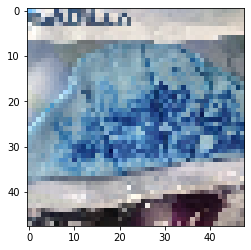

In [ ]:
plt.imshow(X_test[5,:,:,:])

In [ ]:
Y_train = pd.DataFrame(trainLabel, columns = ['Label'])
Y_train = np.asarray(Y_train)
Y_train = Y_train.reshape(-1,)

Y_test = pd.DataFrame(testLabel, columns = ['Label'])
Y_test = np.asarray(Y_test)
Y_test = Y_test.reshape(-1,)
Y_test



array([ 0,  0,  0, ..., 10, 10, 10])

In [ ]:
print(Y_test[:5])
print(type(Y_test))

[0 0 0 0 0]
<class 'numpy.ndarray'>


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ip (InputLayer)             [(None, 32, 32, 3)]       0         
                                                                 
 cn1 (Conv2D)                (None, 32, 32, 4)         304       
                                                                 
 pl1 (MaxPooling2D)          (None, 32, 32, 4)         0         
                                                                 
 cn2 (Conv2D)                (None, 32, 32, 20)        2020      
                                                                 
 pl2 (MaxPooling2D)          (None, 32, 32, 20)        0         
                                                                 
 flat (Flatten)              (None, 20480)             0         
                                                                 
 hd1 (Dense)                 (None, 10240)             2097

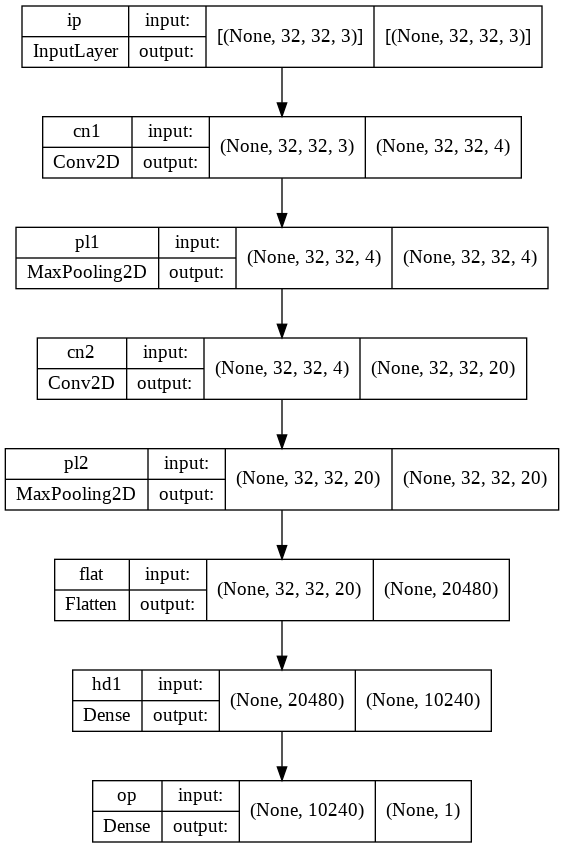

In [ ]:
import tensorflow
from tensorflow.keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers import ZeroPadding2D


visible = Input(shape= (32,32,3), name = 'ip')
conv1 = Conv2D(filters=4, kernel_size = (5,5), strides=1, padding = "same", activation= 'relu', name = 'cn1')(visible)
pool1 = MaxPooling2D(pool_size=(2,2), strides=1, padding = "same", name = 'pl1')(conv1)

conv2 = Conv2D(filters = 20, kernel_size = (5,5), strides=1, padding = "same", activation= 'relu', name = 'cn2')(pool1)
pool2 = MaxPooling2D(pool_size=(2,2), strides=1, padding = "same", name = 'pl2')(conv2)

# conv3 = Conv2D(filters = 8, kernel_size = (5,5), strides=2, padding = "same", activation= 'relu', name = 'cn2')(pool2)
# pool3 = MaxPooling2D(pool_size=(3,3), strides=2, padding = "same", name = 'pl2')(conv3)

flat = Flatten(name='flat')(pool2)
hidden1 = Dense(10240, activation = 'relu', name = 'hd1')(flat)


output = Dense(1, activation='softmax', name = 'op')(hidden1)
my_model = Model(inputs = visible, outputs = output)

print(my_model.summary())
plot_model(my_model, to_file='convolutional_neural_network.png', show_shapes=True, show_layer_names=True)


In [ ]:
# compile the keras model
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam
my_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy','mse','mae'])

# my_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

my_history = my_model.fit(X_train, Y_train, epochs=10, batch_size=200,verbose=1, validation_split=0.1)


Epoch 1/10
45/45 [==============================] - 14s 72ms/step - loss: 2.3072 - accuracy: 0.1660 - mse: 26.8367 - mae: 4.3040 - val_loss: 3.1291 - val_accuracy: 0.0000e+00 - val_mse: 92.8919 - val_mae: 9.6274
Epoch 2/10
45/45 [==============================] - 3s 60ms/step - loss: 2.1735 - accuracy: 0.1986 - mse: 26.8387 - mae: 4.3040 - val_loss: 4.0194 - val_accuracy: 0.1662 - val_mse: 92.8945 - val_mae: 9.6274
Epoch 3/10
45/45 [==============================] - 3s 66ms/step - loss: 2.0700 - accuracy: 0.2290 - mse: 26.8406 - mae: 4.3040 - val_loss: 4.8937 - val_accuracy: 0.1560 - val_mse: 92.8949 - val_mae: 9.6274
Epoch 4/10
45/45 [==============================] - 3s 69ms/step - loss: 2.0255 - accuracy: 0.2553 - mse: 26.8414 - mae: 4.3040 - val_loss: 5.0682 - val_accuracy: 0.2026 - val_mse: 92.8950 - val_mae: 9.6274
Epoch 5/10
45/45 [==============================] - 3s 71ms/step - loss: 1.9644 - accuracy: 0.2796 - mse: 26.8423 - mae: 4.3040 - val_loss: 6.7427 - val_accuracy: 0.20

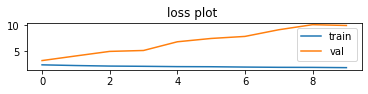

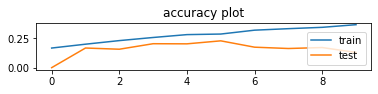

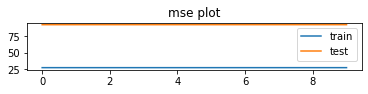

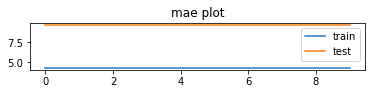

In [ ]:
# plot loss
from matplotlib import pyplot
pyplot.subplot(411)
pyplot.title('loss plot ')
pyplot.plot(my_history.history['loss'], label='train')
pyplot.plot(my_history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

# plot acc during training
pyplot.subplot(412)
pyplot.title('accuracy plot')
pyplot.plot(my_history.history['accuracy'], label='train')
pyplot.plot(my_history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# plot acc during training
pyplot.subplot(412)
pyplot.title('mse plot')
pyplot.plot(my_history.history['mse'], label='train')
pyplot.plot(my_history.history['val_mse'], label='test')
pyplot.legend()
pyplot.show()

# plot acc during training
pyplot.subplot(412)
pyplot.title('mae plot')
pyplot.plot(my_history.history['mae'], label='train')
pyplot.plot(my_history.history['val_mae'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
import keras
# make class predictions with the model
y_pred = my_model.predict(X_test)

keras.metrics.categorical_accuracy(Y_test, y_pred)

score = my_model.evaluate(X_test, Y_test, verbose=1)
print("%s: %.2f%%" % (my_model.metrics_names[1], score[1]*100))

105/105 [==============================] - 1s 8ms/step - loss: 279.3293 - accuracy: 0.2949 - mse: 33.1311 - mae: 4.7839
accuracy: 29.49%


In [ ]:
import tensorflow
from tensorflow.keras.utils import plot_model
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers import ZeroPadding2D
from keras.layers.pooling import GlobalAveragePooling2D
from keras.layers import Dropout
from keras.layers import Activation

def pure_cnn_model():
  model = Sequential()
  model.add(Input(shape = (48,48,3)))
  model.add(Conv2D(96,(3,3), activation = 'relu', padding = 'same' ))
  model.add(Dropout(0.2))

  model.add(Conv2D(96,(3,3), activation = 'relu', padding = 'same'))
  model.add(Conv2D(96,(3,3), activation = 'relu', padding = 'same', strides = 2))
  model.add(Dropout(0.5))

  model.add(Conv2D(192,(3,3), activation = 'relu', padding = 'same'))
  model.add(Conv2D(192,(3,3), activation = 'relu', padding = 'same'))
  model.add(Conv2D(192,(3,3), activation = 'relu', padding = 'same', strides = 2))
  model.add(Dropout(0.5))

  model.add(Conv2D(192,(3,3), padding ='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(192,(1,1), padding ='valid'))
  model.add(Activation('relu'))
  model.add(Conv2D(11,(1,1), padding ='valid'))

  model.add(GlobalAveragePooling2D())
  model.add(Activation('softmax'))

  model.summary()
  return model

In [ ]:
model = pure_cnn_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 96)        2688      
                                                                 
 dropout (Dropout)           (None, 48, 48, 96)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 96)        83040     
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 96)        83040     
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 96)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 192)       166080    
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 192)       3

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('pure_cnn', monitor = 'val_loss', verbose = 0, save_best_only = True, mode = 'auto')

from gc import callbacks
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy', 'mae','mse'])
model_details = model.fit(X_train, Y_train, batch_size = 128, epochs = 500, callbacks = [checkpoint], validation_split = 0.1, verbose = 1 )

NameError: ignored

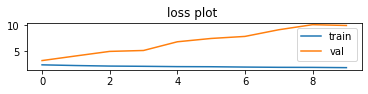

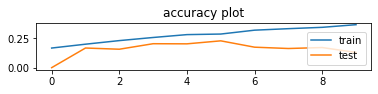

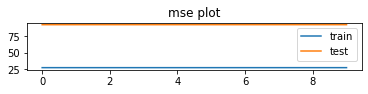

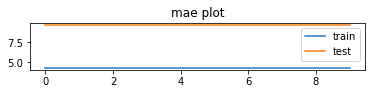

In [ ]:
# plot loss
from matplotlib import pyplot
pyplot.subplot(411)
pyplot.title('loss plot ')
pyplot.plot(model_details.history['loss'], label='train')
pyplot.plot(model_details.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

# plot acc during training
pyplot.subplot(412)
pyplot.title('accuracy plot')
pyplot.plot(model_details.history['accuracy'], label='train')
pyplot.plot(model_details.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# plot acc during training
pyplot.subplot(412)
pyplot.title('mse plot')
pyplot.plot(model_details.history['mse'], label='train')
pyplot.plot(model_details.history['val_mse'], label='test')
pyplot.legend()
pyplot.show()

# plot acc during training
pyplot.subplot(412)
pyplot.title('mae plot')
pyplot.plot(model_details.history['mae'], label='train')
pyplot.plot(model_details.history['val_mae'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
import keras
# make class predictions with the model
y_pred = model.predict(X_test)

keras.metrics.categorical_accuracy(Y_test, y_pred)

score = model.evaluate(X_test, Y_test, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

105/105 [==============================] - 1s 7ms/step - loss: 279.3293 - accuracy: 0.2949 - mse: 33.1311 - mae: 4.7839
accuracy: 29.49%


# **Augment the Data**

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)
datagen.fit(X_train)

In [ ]:
augment_model = pure_cnn_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 96)        2688      
                                                                 
 dropout (Dropout)           (None, 48, 48, 96)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 96)        83040     
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 96)        83040     
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 96)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 192)       166080    
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 192)       3

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('pure_cnn', monitor = 'val_loss', verbose = 0, save_best_only = True, mode = 'auto')

from gc import callbacks
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam
augment_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy', 'mae','mse'])
augment_model_details = augment_model.fit_generator(datagen.flow(X_train, Y_train, batch_size = 128), epochs = 100, callbacks = [checkpoint], verbose = 1 )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/100
78/78 [==============================] - 35s 276ms/step - loss: 2.3023 - accuracy: 0.1574 - mae: 4.8366 - mse: 33.4451
Epoch 2/100
78/78 [==============================] - 21s 268ms/step - loss: 2.2418 - accuracy: 0.1713 - mae: 4.8366 - mse: 33.4458
Epoch 3/100
78/78 [==============================] - 21s 267ms/step - loss: 2.1947 - accuracy: 0.1954 - mae: 4.8366 - mse: 33.4467
Epoch 4/100
78/78 [==============================] - 21s 267ms/step - loss: 2.1301 - accuracy: 0.2325 - mae: 4.8366 - mse: 33.4483
Epoch 5/100
78/78 [==============================] - 21s 267ms/step - loss: 2.0872 - accuracy: 0.2570 - mae: 4.8366 - mse: 33.4497
Epoch 6/100
78/78 [==============================] - 21s 267ms/step - loss: 2.0423 - accuracy: 0.2707 - mae: 4.8366 - mse: 33.4506
Epoch 7/100
78/78 [==============================] - 21s 269ms/step - loss: 2.0063 - accuracy: 0.2870 - mae: 4.8366 - mse: 33.4513
Epoch 8/100
78/78 [==============================] - 21s 267ms/step - loss: 1.9807 

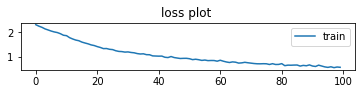

KeyError: ignored

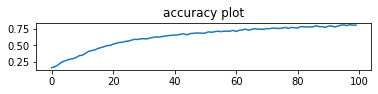

In [ ]:
# plot loss
from matplotlib import pyplot
pyplot.subplot(411)
pyplot.title('loss plot ')
pyplot.plot(augment_model_details.history['loss'], label='train')
pyplot.legend()
pyplot.show()

# plot acc during training
pyplot.subplot(412)
pyplot.title('accuracy plot')
pyplot.plot(augment_model_details.history['accuracy'], label='train')
pyplot.plot(augment_model_details.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# plot acc during training
pyplot.subplot(412)
pyplot.title('mse plot')
pyplot.plot(augment_model_details.history['mse'], label='train')
pyplot.plot(augment_model_details.history['val_mse'], label='test')
pyplot.legend()
pyplot.show()

# plot acc during training
pyplot.subplot(412)
pyplot.title('mae plot')
pyplot.plot(augment_model_details.history['mae'], label='train')
pyplot.plot(augment_model_details.history['val_mae'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
import keras
# make class predictions with the model
y_pred = augment_model.predict(X_test)

keras.metrics.categorical_accuracy(Y_test, y_pred)

score = augment_model.evaluate(X_test, Y_test, verbose=1)
print("%s: %.2f%%" % (augment_model.metrics_names[1], score[1]*100))

105/105 [==============================] - 3s 29ms/step - loss: 156.5252 - accuracy: 0.2940 - mae: 4.7839 - mse: 33.1315
accuracy: 29.40%
